In [ ]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:

# PassengerId-type should be integers
# Survived-Survived or Not
# Pclass-Class of Travel
# Name-Name of Passenger
# Sex-Gender
# Age-
# SibSp-Number of Sibling/Spouse aboard
# Parch-Number of Parent/Child aboard
# Ticket-
# Fare-
# Cabin-
# Embarked-The port in which a passenger has embarked. 
        #C - Cherbourg, S - Southampton, Q = Queenstown

In [3]:
df = pd.read_csv('train.csv')

Text(0, 0.5, '# of Null Values')

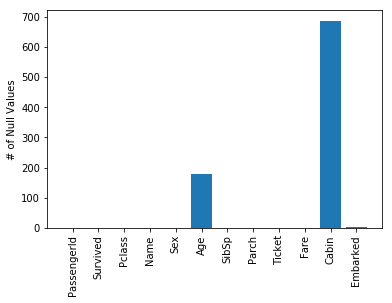

In [4]:
null_series = df.isnull().sum()
plt.bar(df.columns, null_series);
plt.xticks(rotation = 90);
plt.ylabel('# of Null Values')

In [5]:
print(null_series)
print('\n\'Cabin\' columns has the most NaN values with ' + str(null_series['Cabin']))

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

'Cabin' columns has the most NaN values with 687


In [6]:
# df.Embarked.unique()
df.Embarked.dropna(inplace=True)
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
# bool_list = df['Cabin'].isnull()
# for nan in df.loc[df['Cabin'].isnull()]['Cabin']:
#     nan = str(nan)
#     nan = "¯\(ツ)/¯"


# Replaces alll NaN values with this guy--> ¯\(ツ)/¯
df['Cabin'].fillna("¯\(ツ)/¯", inplace=True)


In [9]:
# create new column which sums the Sibling/Spouse and Parent/Child colums into a single total family colum=n
df['FamilyCount'] = df.SibSp + df.Parch

In [10]:
# is the person a reverend
# iterate through the dataframe and if "Rev" is in the name then assign isReverend=1 for that row
rev = 'Rev'
for index, row in df.iterrows():
    if rev in row['Name']:
        df.loc[index,'isReverend'] = 1
    else:
        df.loc[index,'isReverend'] = 0

# df.isReverend.value_counts()

In [11]:
# create three new columns Embarked_C Embarked_Q Embarked_S and assign dummy values
training_data = pd.get_dummies(df, columns=['Embarked'])

# create two new columns Sex_female, Sex_male and assign dummy values
training_data = pd.get_dummies(training_data, columns=['Sex'])

#training_data

In [20]:
# BONUS: Extract the title from everyone's name and create dummy columns
# def what_is_title
for index, row in training_data.iterrows():
    if 'Mrs.' in row['Name']:
        training_data.loc[index,'Title_Mrs'] = int(1)
    elif 'Ms.' in row['Name']:
        training_data.loc[index,'Title_Miss'] = int(1)
    elif 'Miss.' in row['Name']:
        training_data.loc[index,'Title_Miss'] = int(1)
    elif 'Mr.' in row['Name']:
        training_data.loc[index,'Title_Mr'] = int(1)
    elif 'Master.' in row['Name']:
        training_data.loc[index,'Title_Master'] = int(1)
    elif 'Dr.' in row['Name']:
        training_data.loc[index,'Title_Dr'] = int(1)

training_data['Title_Mrs'].fillna(int(0), inplace=True)
training_data['Title_Miss'].fillna(int(0), inplace=True)
training_data['Title_Mr'].fillna(int(0), inplace=True)
training_data['Title_Dr'].fillna(int(0), inplace=True)
training_data['Title_Master'].fillna(int(0), inplace=True)

print('Doctor Counts')
print(training_data.Title_Dr.value_counts())
print('\n')
print('Mrs Counts')
print(training_data.Title_Mrs.value_counts())
print('\n')
print('Miss Counts')
print(training_data.Title_Miss.value_counts())
print('\n')
print('Mr Counts')
print(training_data.Title_Mr.value_counts())
print('\n')
print('Master Counts')
print(training_data.Title_Master.value_counts())

Doctor Counts
0.0    884
1.0      7
Name: Title_Dr, dtype: int64


Mrs Counts
0.0    766
1.0    125
Name: Title_Mrs, dtype: int64


Miss Counts
0.0    708
1.0    183
Name: Title_Miss, dtype: int64


Mr Counts
1.0    517
0.0    374
Name: Title_Mr, dtype: int64


Master Counts
0.0    851
1.0     40
Name: Title_Master, dtype: int64


In [14]:
# Step 4: Exploratory analysis
# What was the survival rate overall?

# df['Survived'].value_counts()
survival_percentage = df['Survived'].value_counts()[1]/len(df.index)*100
print(("Overall survival rate was {}%").format(round(survival_percentage,3)))

Overall survival rate was 38.384%


In [21]:
# Which gender fared the worst? What was their survival rate?

# survival_percentage_male = df['Survived','Sex'].value_counts()[1]/len(df.index)*100
# survival_percentage_female = df['Survived'].value_counts()[1]/len(df.index)*100

fem = df[(df['Survived']==1)&(df['Sex']=='female')]
mal = df[(df['Survived']==1)&(df['Sex']=='male')]

male_survivors = len(mal.index)
female_survivors = len(fem.index)

total_males = len(df[df['Sex']=='male'].index)
total_females = len(df[df['Sex']=='female'].index)


print(("Survival rate for males was {}%").format(round(male_survivors/total_males,2)*100))
print(("Survival rate for females was {}%").format(round(female_survivors/total_females,2)*100))

Survival rate for males was 19.0%
Survival rate for females was 74.0%


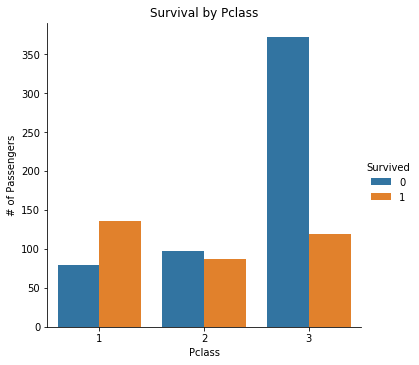

In [29]:
# What was the survival rate for each Pclass?
ax = sns.catplot(x="Pclass", hue="Survived", data=df, kind="count")
ax.set(ylabel='# of Passengers')
plt.title('Survival by Pclass')


In [31]:
# Did any reverends survive? How many?
total_rev = len(df[df['isReverend']==1].index)
surv_rev = len(df[(df['Survived']==1)&(df['isReverend']==1)].index)
print(surv_rev, "reverends survived.")


0 reverends survived.


In [35]:
# What is the survival rate for cabins marked ¯\(ツ)/¯
unknown_cabins_surv = len(df.query("Cabin == '¯\(ツ)/¯' & Survived==1").index)
print("The survival rate for cabins marked ¯\(ツ)/¯ was {}%".format(unknown_cabins_surv/len(df.index)*100))

The survival rate for cabins marked ¯\(ツ)/¯ was 23.120089786756452%


In [37]:
# What is the survival rate for people whose Age is empty?

survived_nan= len(df[ (df['Survived']==1) & (np.isnan(df.Age)==True)].index)
total_nan= len(df[(np.isnan(df.Age)==True)].index)
survival_rate_nan = survived_nan/total_nan*100
print("{}% of people who's ages were marked null survived".format(survival_rate_nan))


29.37853107344633% of people who's ages were marked null survived


In [38]:
# What is the survival rate for each port of embarkation?
survival_rate_c = len(df[ (df['Survived']==1) & (df.Embarked=='C')].index)/len(df[(df.Embarked=='C')].index)*100
survival_rate_s = len(df[ (df['Survived']==1) & (df.Embarked=='S')].index)/len(df[(df.Embarked=='S')].index)*100
survival_rate_q = len(df[ (df['Survived']==1) & (df.Embarked=='Q')].index)/len(df[(df.Embarked=='Q')].index)*100

print("{}% of people who embarked from Cherbourg survived".format(survival_rate_c))
print("{}% of people who embarked from Southampton survived".format(survival_rate_s))
print("{}% of people who embarked from Queenstown survived".format(survival_rate_q))

55.35714285714286% of people who embarked from Cherbourg survived
33.69565217391305% of people who embarked from Southampton survived
38.961038961038966% of people who embarked from Queenstown survived


In [ ]:
# What is the survival rate for children (under 12) in each Pclass?

df[ (df['Survived']==1) & (df.Age<12)]

In [51]:
# Did the captain of the ship survive? Is he on the list?
for index, row in training_data.iterrows():
    if 'capt' in row['Name'].lower():
        print(row)
        break
        
print('\n' + row['Name'] + " did not survive")

PassengerId                              746
Survived                                   0
Pclass                                     1
Name            Crosby, Capt. Edward Gifford
Age                                       70
SibSp                                      1
Parch                                      1
Ticket                             WE/P 5735
Fare                                      71
Cabin                                    B22
FamilyCount                                2
isReverend                                 0
Embarked_C                                 0
Embarked_Q                                 0
Embarked_S                                 1
Sex_female                                 0
Sex_male                                   1
Title_Mr                                   0
Title_Mrs                                  0
Title_Miss                                 0
Title_Master                               0
Title_Dr                                   0
Name: 745,

In [53]:
# Of all the people that died, who had the most expensive ticket? How much did it cost?
sorted_by_fare = df[(df['Survived']==0)].sort_values(by='Fare', ascending=False)
print(sorted_by_fare['Fare'].head())
print("The most expensive ticket of all the people that died was $263")

27     263.0000
438    263.0000
118    247.5208
557    227.5250
527    221.7792
Name: Fare, dtype: float64
The most expensive ticket of all the people that died was $263


It seems like the bigger your family is the lower the chances of you surviving are. It might make sense if we look at what class they were in since the larger the family the more lower the class they were in


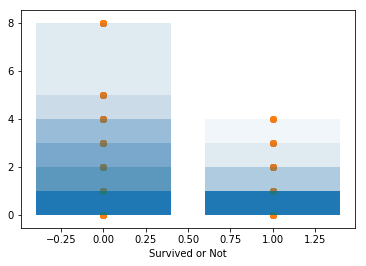

In [55]:
# Does having family on the boat help or hurt your chances of survival?
plt.bar(df['Survived'],df['SibSp'],alpha=.02)
plt.scatter(df['Survived'],df['SibSp'])
plt.xlabel('Survived or Not')
print("It seems like the bigger your family is the lower the chances of you surviving are. It might make sense if we look at what class they were in since the larger the family the more lower the class they were in")

In [ ]:
# Step 5: Plotting
# Using Matplotlib and Seaborn, create several charts showing 
# the survival rates of different groups of people. It's fine if a handful of 
# charts are basic (Gender, Age, etc), but what we're really looking for is something
# beneath the surface.




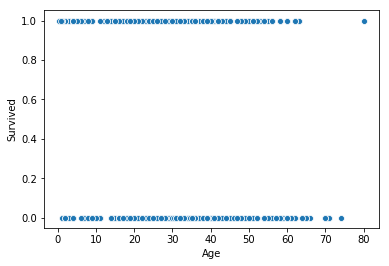

In [56]:
sns.scatterplot(df['Age'],df['Survived'])


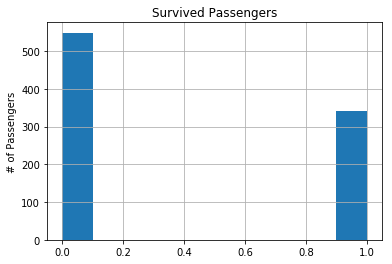

In [57]:
plt.figure(1)
df['Survived'].hist()
plt.title('Survived Passengers')
plt.ylabel('# of Passengers')
plt.show()


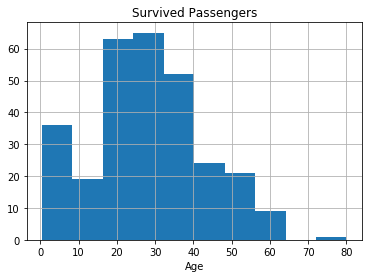

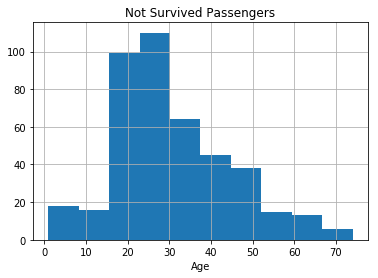

In [58]:
#survived data
survived_age = df[ df['Survived'] == 1 ]['Age']

#not survived data
not_survived_age = df[df['Survived'] == 0 ]['Age']


plt.figure(1)
survived_age.hist()
plt.title('Survived Passengers')
plt.xlabel('Age')
plt.show()

plt.figure(2)
not_survived_age.hist()
plt.title('Not Survived Passengers')
plt.xlabel('Age')
plt.show()

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Distribution of Age by Survival')

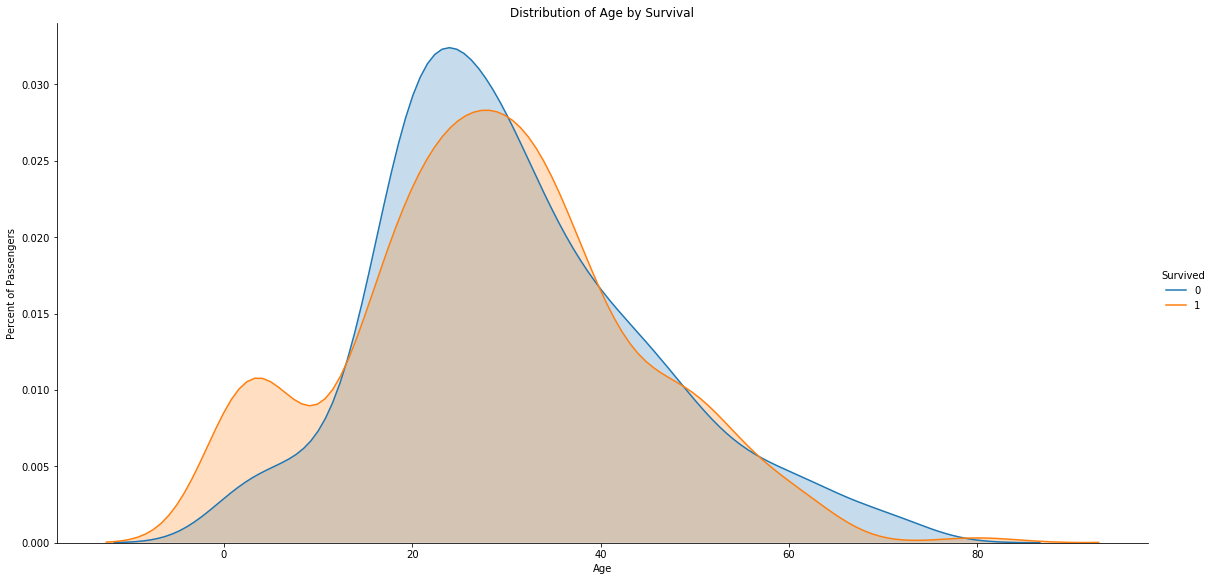

In [67]:
#full disclosure- found this graph by googling
facet = sns.FacetGrid(data=df, hue="Survived", aspect=2, size=8)
facet.map(sns.kdeplot, "Age", shade=True)
facet.set(ylabel='Percent of Passengers')
facet.add_legend()
plt.title('Distribution of Age by Survival')

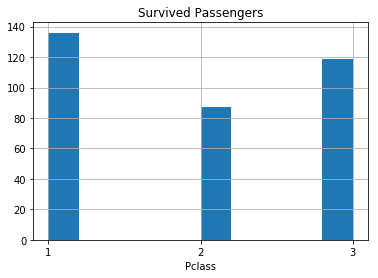

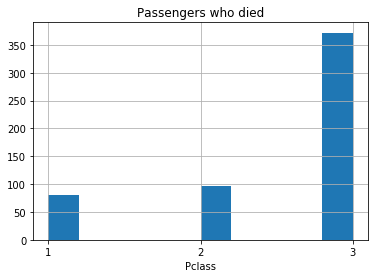

In [68]:

#plot for survived passengers
plt.figure(2)
df[df['Survived'] == 1 ]['Pclass'].hist()
plt.title('Survived Passengers')
plt.xlabel('Pclass')
plt.xticks(range(1,4))
plt.show()

#plot for non survived passengers
plt.figure(3)
df[df['Survived'] == 0 ]['Pclass'].hist()
plt.title('Passengers who died')
plt.xlabel('Pclass')
plt.xticks(range(1,4))
plt.show()

Text(0, 0.5, '# of Passengers')

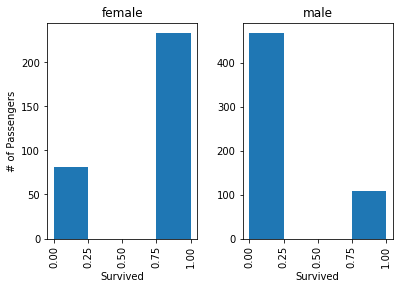

In [62]:
sexhists = df['Survived'].hist(by = df['Sex'], bins = 4)

sexhists[0].set_xlabel('Survived')
sexhists[0].set_ylabel('# of Passengers')

sexhists[1].set_xlabel('Survived')
sexhists[0].set_ylabel('# of Passengers')

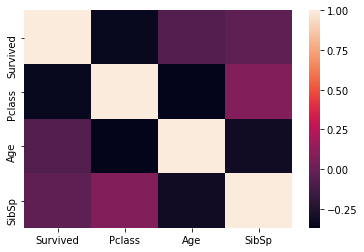

In [69]:
sns.heatmap(df[['Survived', 'Pclass', 'Age', 'Sex', 'SibSp']].corr())